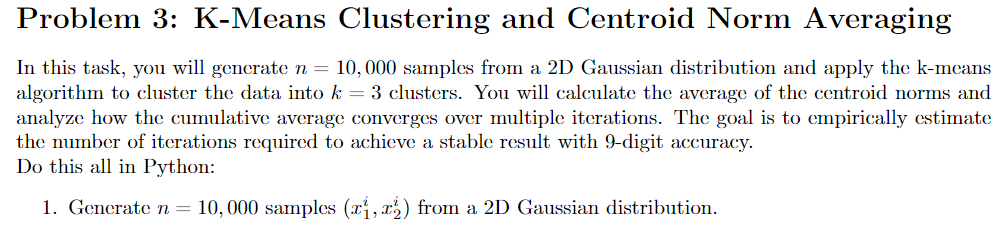
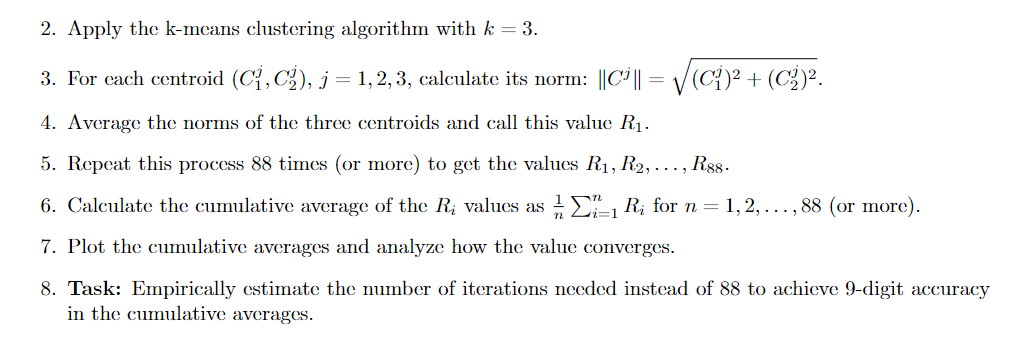

In [60]:
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

Step 1: Generate n = 10,000 samples from a 2D Gaussian distribution

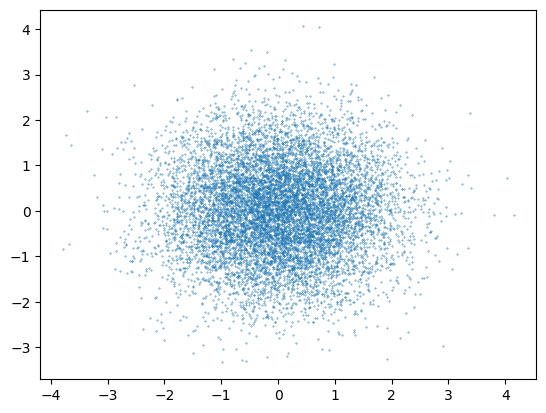

In [61]:
n_samples = 10000
mean = [0, 0]
# Identity matrix for independent variables
cov = [[1, 0], 
       [0, 1]]  

samples = np.random.multivariate_normal(mean, cov, n_samples)

plt.scatter(samples[:, 0], samples[:, 1], s=0.1)
plt.show()

Step 2: Apply k-means clustering

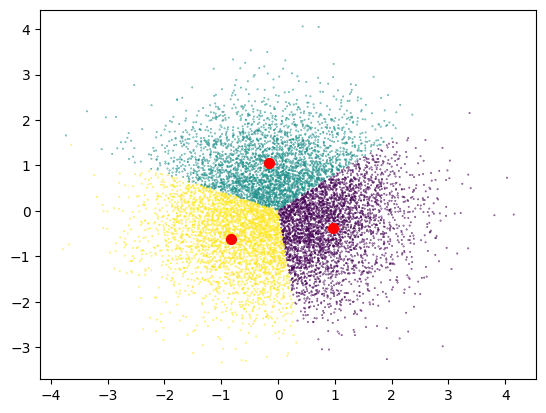

In [62]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(samples)
centroids = kmeans.cluster_centers_


plt.scatter(samples[:, 0], samples[:, 1], c=kmeans.labels_, s=0.1)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()



Step 3: For each centroid calculate its norm

In [63]:
norms =[(centroid[0]**2 + centroid[1]**2)**0.5 for centroid in centroids]
norms


[1.035375416924717, 1.0573563119205112, 1.028894897717768]

Step 4: Average the norms of the three centroids and call it R1

In [64]:
R1 = np.mean(norms)
R1

1.0405422088543321

Step 5: Repeat steps 1-4 more times

In [65]:
repetitions = 88

R_i = []

for _ in range(repetitions+1):
    samples = np.random.multivariate_normal(mean, cov, n_samples)

    kmeans = KMeans(n_clusters=3)
    kmeans.fit(samples)
    
    centroids = kmeans.cluster_centers_
    norms = [(centroid[0]**2 + centroid[1]**2)**0.5 for centroid in centroids]

    R_i.append(np.mean(norms))


Step 6: Calculate the cumulative average

In [66]:
cumulative_averages = [np.mean(R_i[:n]) for n in range(1, repetitions+1)]

Step 7: Plot the cumulative averages

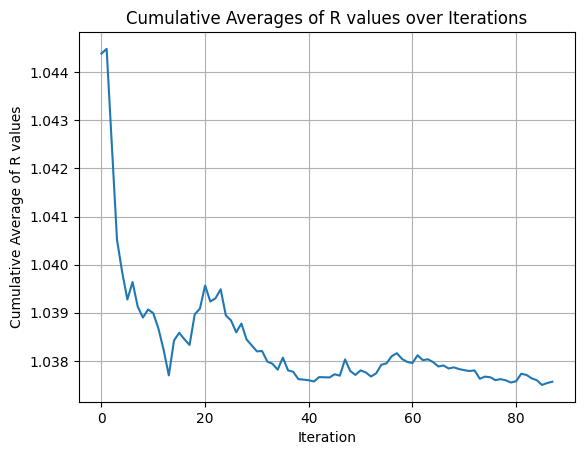

In [67]:
plt.plot(cumulative_averages)
plt.xlabel('Iteration')
plt.ylabel('Cumulative Average of R values')
plt.title('Cumulative Averages of R values over Iterations')
plt.grid(True)
plt.show()

Step 8: Estimate the number of iterations for 9-digit accuracy

In [68]:
acc = 1e-9

R_i = []
cumulative_averages = []

while True:
    samples = np.random.multivariate_normal(mean, cov, n_samples)

    kmeans = KMeans(n_clusters=3)
    kmeans.fit(samples)
    
    centroids = kmeans.cluster_centers_
    norms = [(centroid[0]**2 + centroid[1]**2)**0.5 for centroid in centroids]

    R_i.append(np.mean(norms))
    
    cumulative_averages.append(np.mean(R_i))
    print(cumulative_averages[-1])

    if len(cumulative_averages) >= 2:
        if abs(cumulative_averages[-1] - cumulative_averages[-2]) < acc:
            print(f'Number of iterations needed for 9-digit accuracy: {len(cumulative_averages)} iterations')
            print(f'Final R value: {cumulative_averages[-1]}')
            print(f"Difference between last two iterations: {abs(cumulative_averages[-1] - cumulative_averages[-2]):.10f}")
            break

1.0360060102342767
1.0365763934367789
1.0360569550577068
1.0369170193345505
1.0342116390457998
1.0354137919996218
1.0350520595155053
1.0339851235956923
1.0343498323729463
1.0342493618422886
1.0351151585980551
1.035361265233732
1.0349956805951472
1.0344341573222606
1.034247931035783
1.0340784205174172
1.0346693790215225
1.0348682057502565
1.0350057254186062
1.0352318402008138
1.0349540047844787
1.0349574452097248
1.0348926174828432
1.0355523508537519
1.0353291343458244
1.0352517328276767
1.034959340772499
1.0348439249730366
1.0347606006945889
1.0348344245259207
1.0347141329155092
1.0345712158434446
1.0345662077772986
1.0344905640161133
1.0345007545667722
1.0347324144746781
1.034653282103686
1.0345047788856636
1.0344894000341218
1.0344495227813728
1.034841491591798
1.0349954485869954
1.0350043324291691
1.0350970320451744
1.035058680400356
1.035037994655307
1.0350576817462573
1.034977326970288
1.035271312415355
1.0353315305504363
1.0352494148172557
1.0352368399711016
1.0351833691975023
1.

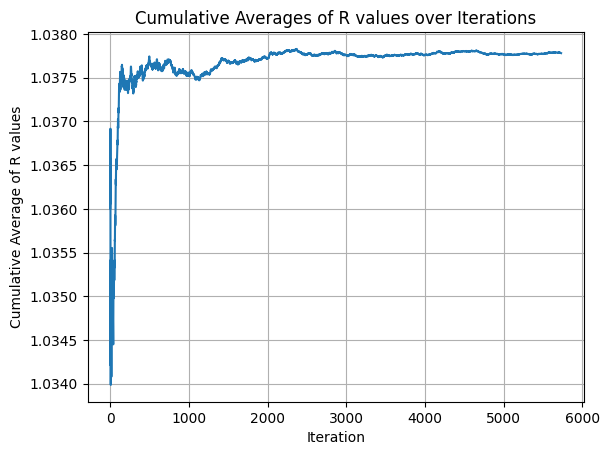

In [69]:
plt.plot(cumulative_averages)
plt.xlabel('Iteration')
plt.ylabel('Cumulative Average of R values')
plt.title('Cumulative Averages of R values over Iterations')
plt.grid(True)
plt.show()